In [3]:
import pandas as pd

# Load the datasets
books = pd.read_csv(r"C:\Users\putva\OneDrive\Desktop\Book Recommader\Dataset\raw\Books.csv")
users = pd.read_csv(r"C:\Users\putva\OneDrive\Desktop\Book Recommader\Dataset\raw\Users.csv")
ratings = pd.read_csv(r"C:\Users\putva\OneDrive\Desktop\Book Recommader\Dataset\raw\Ratings.csv")

# Display the first few rows of each dataset to understand their structure
print(books.head())
print(users.head())
print(ratings.head())

C:\Users\putva\AppData\Local\Temp\ipykernel_7784\2070821507.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r"C:\Users\putva\OneDrive\Desktop\Book Recommader\Dataset\raw\Books.csv")


         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [4]:
# Check for missing values
print(books.isnull().sum())
print(users.isnull().sum())
print(ratings.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [5]:
# Check data types
print(books.dtypes)
print(users.dtypes)
print(ratings.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
User-ID       int64
Location     object
Age         float64
dtype: object
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [6]:
# Get a statistical summary for numerical columns
print(books.describe())
print(users.describe())
print(ratings.describe())

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq          

In [9]:
# Check unique values in relevant columns
print("\nUnique values in Book-Author column:")
print(books['Book-Author'].unique())

print("\nUnique values in Publisher column:")
print(books['Publisher'].unique())

print("\nUnique values in Location column:")
print(users['Location'].unique())


Unique values in Book-Author column:
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']

Unique values in Publisher column:
['Oxford University Press' 'HarperFlamingo Canada' 'HarperPerennial' ...
 'Tempo' 'Life Works Books' 'Connaught']

Unique values in Location column:
['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


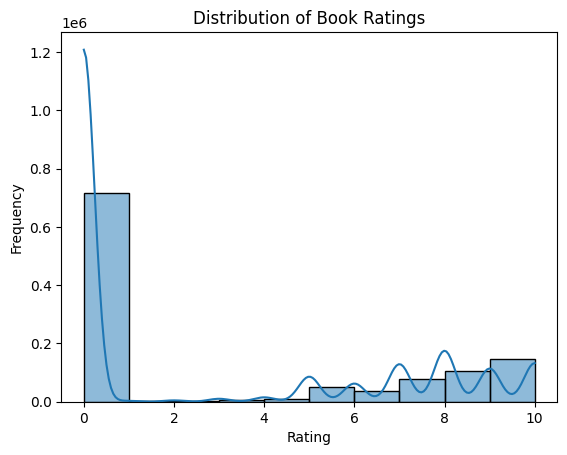

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
sns.histplot(ratings['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

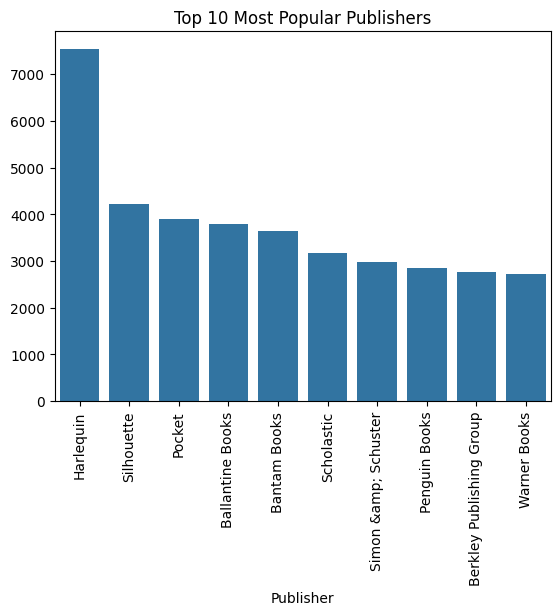

In [11]:
# Count the frequency of each publisher and visualize it
publisher_counts = books['Publisher'].value_counts().head(10)
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Top 10 Most Popular Publishers')
plt.xticks(rotation=90)
plt.show()

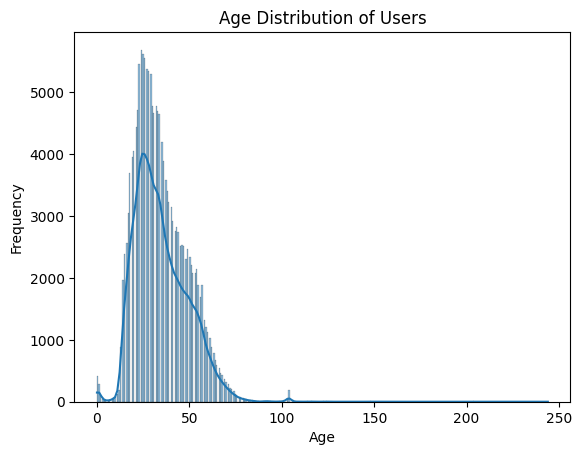

In [12]:
# If the 'Age' column exists in users dataset, plot age distribution
sns.histplot(users['Age'], kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

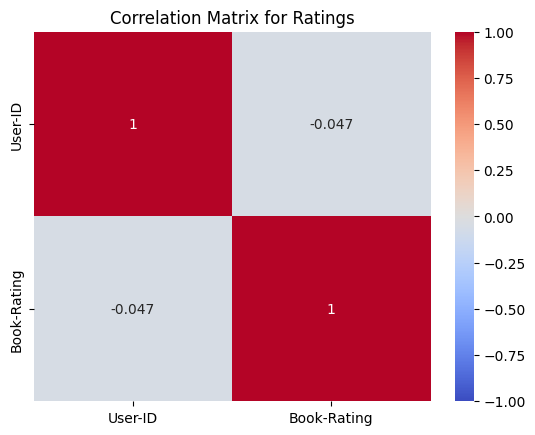

In [14]:

# Ensure 'Book-Rating' is numeric (in case of any non-numeric entries)
ratings['Book-Rating'] = pd.to_numeric(ratings['Book-Rating'], errors='coerce')

# Select only the numerical columns for correlation (e.g., 'User-ID' and 'Book-Rating')
numerical_columns = ratings[['User-ID', 'Book-Rating']]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Ratings')
plt.show()
